---
title: Linking Interactive Notebooks
subtitle: Evolve markdown documents and notebooks into structured data
author:
  - name: Rowan Cockett
    affiliations: Executable Books; Curvenote
    orcid: 0000-0002-7859-8394
    email: rowan@curvenote.com
license:
  code: MIT
date: 2023/01/23
---

MyST allows you to directly include Jupyter Notebooks in your books, documents and websites.
This Jupyter Notebook can be rendered directly using MyST.

For example, let us import `altair` and create a demo of an interactive plot!

In [4]:
import altair as alt
from vega_datasets import data

source = data.cars()
brush = alt.selection_interval(encodings=['x'])
points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    size='Acceleration',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(brush)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(brush)

/var/folders/q4/jhd9ncvx6w56g5stfrmz18000000gn/T/ipykernel_82245/3253246330.py:11: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  ).add_selection(brush)


We can now plot the altair example, which is fully interactive, try dragging in the plot to select cars by their horsepower.

In [5]:
#| label: horsepower
points & bars

alt.VConcatChart(...)

In [6]:
# https://matplotlib.org/stable/gallery/statistics/time_series_histogram.html#sphx-glr-gallery-statistics-time-series-histogram-py
from copy import copy

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [7]:
# Make some data; a 1D random walk + small fraction of sine waves
num_series = 1000
num_points = 100
SNR = 0.10  # Signal to Noise Ratio
x = np.linspace(0, 4 * np.pi, num_points)
# Generate unbiased Gaussian random walks
Y = np.cumsum(np.random.randn(num_series, num_points), axis=-1)
# Generate sinusoidal signals
num_signal = int(round(SNR * num_series))
phi = (np.pi / 8) * np.random.randn(num_signal, 1)  # small random offset
Y[-num_signal:] = (
    np.sqrt(np.arange(num_points))[None, :]  # random walk RMS scaling factor
    * (np.sin(x[None, :] - phi)
       + 0.05 * np.random.randn(num_signal, num_points))  # small random noise
)


# Now we will convert the multiple time series into a histogram. Not only will
# the hidden signal be more visible, but it is also a much quicker procedure.
# Linearly interpolate between the points in each time series
num_fine = 800
x_fine = np.linspace(x.min(), x.max(), num_fine)
y_fine = np.empty((num_series, num_fine), dtype=float)
for i in range(num_series):
    y_fine[i, :] = np.interp(x_fine, x, Y[i, :])
y_fine = y_fine.flatten()
x_fine = np.matlib.repmat(x_fine, num_series, 1).flatten()

Important!
This data is simulated, and may just be random noise! 🔊

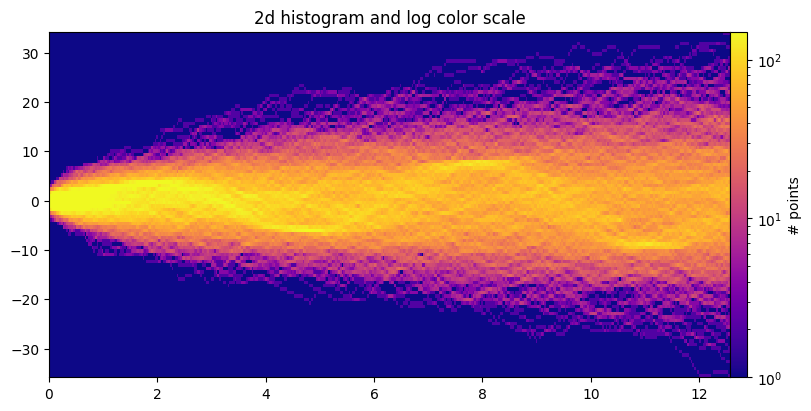

In [8]:
#| label: plasma
fig, axes = plt.subplots(figsize=(8, 4), constrained_layout=True)
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[400, 100])
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmax=1.5e2), rasterized=True)
fig.colorbar(pcm, ax=axes, label="# points", pad=0)
axes.set_title("2d histogram and log color scale");

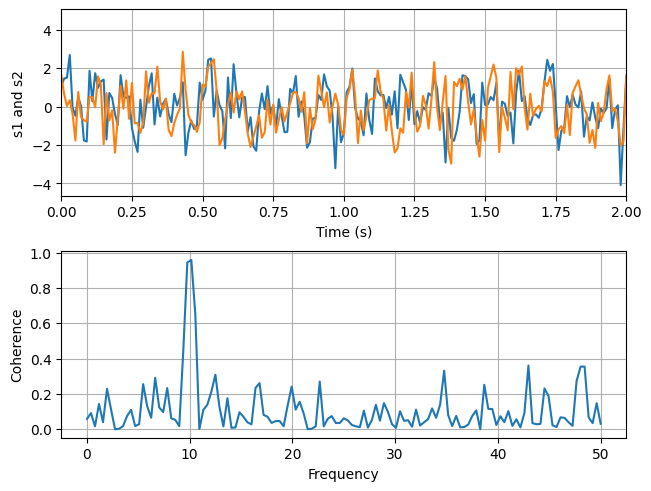

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('Coherence')

plt.show()